<a href="https://colab.research.google.com/github/HunterBushnell/LUT_singlecell/blob/main/LUT_singlecell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install
!pip install neuron==8.2.2
!pip install bmtk==1.0.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 45.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 743.6/743.6 kB 3.1 MB/s eta 0:00:00


In [2]:
# Download Files

import os

if os.path.basename(os.getcwd())!='LUT_singlecell':
  !git clone https://github.com/HunterBushnell/LUT_singlecell
  %cd LUT_singlecell/
else:
  print('Mod files have already been downloaded.')
%ls

Cloning into 'LUT_singlecell'...
remote: Enumerating objects: 366, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 366 (delta 2), reused 0 (delta 0), pack-reused 336
Receiving objects: 100% (366/366), 6.58 MiB | 25.23 MiB/s, done.
Resolving deltas: 100% (157/157), done.
/content/LUT_singlecell
biophys_components/  graphs/   notes/           plotting.py       run_bionet.py
build_network.py     images/   output/          __pycache__/      run.sh
error_logs/          jsons/    plot_results.py  README.md         spikes.csv
feedback_loop.py     network/  plotting.pkl     requirements.txt  synapses.py


In [3]:
# Compile Files

import os 
# move to the mechanisms folder
%cd biophys_components/mechanisms/
os.system("rm -rf x86_64") # deletes x86_64 if its there
%ls # just to make sure its gone
print(os.system('nrnivmodl modfiles')) # compile modfiles. Return 0 for success, 1 for failure.
%ls # check to make sure the folder is there now
%cd ../..
%ls

/content/LUT_singlecell/biophys_components/mechanisms
filess  modfiles/
0
filess  modfiles/  x86_64/
/content/LUT_singlecell
biophys_components/  graphs/   notes/           plotting.py       run_bionet.py
build_network.py     images/   output/          __pycache__/      run.sh
error_logs/          jsons/    plot_results.py  README.md         spikes.csv
feedback_loop.py     network/  plotting.pkl     requirements.txt  synapses.py


In [4]:
# Build Network

import numpy as np
from bmtk.builder.networks import NetworkBuilder
import math
import random

output_dir='network'

#######################################################################
##################### Create the cells ################################
#######################################################################
print("\nCreating Cells")

# Build the main network
net = NetworkBuilder('LUT_TOY')

# Specify number of cells in each population #

numPGN  = 1
#numBladaff  = 1

# Create the nodes ----------------------------------------
net.add_nodes(N=numPGN, level='low',pop_name='PGN',model_type='biophysical',model_template='hoc:PGN',morphology='blank.swc')
#net.add_nodes(N=numBladaff, level='high',pop_name='Bladaff',model_type='point_process', model_template= 'nrn:IntFire1', morphology='NULL', dynamics_params = 'IntFire1_exc_1.json')

####################################################################################
########################## Build and save network ##################################
####################################################################################

print("\nBuilding network and saving to directory \"" + output_dir + "\"")
net.build()

net.save_nodes(output_dir=output_dir)
#net.save_edges(output_dir=output_dir)

print("Done")


Creating Cells

Building network and saving to directory "network"
Done


2023-04-10 19:22:50,523 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


2023-04-10 19:22:50,668 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2023-04-10 19:22:50,674 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


{0: <bmtk.simulator.bionet.biocell.BioCell object at 0x7fdcaf94a7f0>}
2023-04-10 19:22:50,693 [INFO] Running simulation for 60500.000 ms with the time step 0.100 ms


INFO:NEURONIOUtils:Running simulation for 60500.000 ms with the time step 0.100 ms


2023-04-10 19:22:50,699 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2023-04-10 19:22:50,706 [INFO] Block save every 10000 steps


INFO:NEURONIOUtils:Block save every 10000 steps


2023-04-10 19:22:51,251 [INFO]     step:10000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:1000.00 ms


Caclulating firing rates for times 0.0 to 1000.0 ms
node_id	Hz
0		0.0
firing rate avg: 0.0
Grill PGN fr = 0.0 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [1061.3127535  1261.08510125 1451.57513415 1673.56640963 1841.34240017
 2000.        ]
2023-04-10 19:22:51,277 [INFO] PGN firing rate = 0.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 0.00 Hz


2023-04-10 19:22:51,282 [INFO] Volume = 0.05 ml


INFO:NEURONIOUtils:Volume = 0.05 ml


2023-04-10 19:22:51,288 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:51,292 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:51,838 [INFO]     step:20000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:2000.00 ms


Caclulating firing rates for times 1000.0 to 2000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [2407.29498679 2426.25537597 2548.16087374 2596.13016651 2794.77519823
 2915.72980254 3000.        ]
2023-04-10 19:22:51,855 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:22:51,859 [INFO] Volume = 0.07 ml


INFO:NEURONIOUtils:Volume = 0.07 ml


2023-04-10 19:22:51,864 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:51,866 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:52,366 [INFO]     step:30000 t_sim:3000.00 ms


INFO:NEURONIOUtils:    step:30000 t_sim:3000.00 ms


Caclulating firing rates for times 2000.0 to 3000.0 ms
node_id	Hz
0		7.0
firing rate avg: 7.0
Grill PGN fr = 11.169 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [3157.92582431 3345.84556773 3485.73099736 3588.68701178 3868.41402973
 4000.        ]
2023-04-10 19:22:52,387 [INFO] PGN firing rate = 7.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 7.00 Hz


2023-04-10 19:22:52,394 [INFO] Volume = 0.08 ml


INFO:NEURONIOUtils:Volume = 0.08 ml


2023-04-10 19:22:52,398 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:52,404 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:52,937 [INFO]     step:40000 t_sim:4000.00 ms


INFO:NEURONIOUtils:    step:40000 t_sim:4000.00 ms


Caclulating firing rates for times 3000.0 to 4000.0 ms
node_id	Hz
0		6.0
firing rate avg: 6.0
Grill PGN fr = 9.544 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [4477.76132868 4538.58892983 4577.29699091 4614.8301362  5000.        ]
2023-04-10 19:22:52,960 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-04-10 19:22:52,968 [INFO] Volume = 0.10 ml


INFO:NEURONIOUtils:Volume = 0.10 ml


2023-04-10 19:22:52,976 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:52,979 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:53,504 [INFO]     step:50000 t_sim:5000.00 ms


INFO:NEURONIOUtils:    step:50000 t_sim:5000.00 ms


Caclulating firing rates for times 4000.0 to 5000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [5345.59985516 5554.07561369 6000.        ]
2023-04-10 19:22:53,529 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:22:53,537 [INFO] Volume = 0.12 ml


INFO:NEURONIOUtils:Volume = 0.12 ml


2023-04-10 19:22:53,541 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:53,544 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:53,932 [INFO]     step:60000 t_sim:6000.00 ms


INFO:NEURONIOUtils:    step:60000 t_sim:6000.00 ms


Caclulating firing rates for times 5000.0 to 6000.0 ms
node_id	Hz
0		3.0
firing rate avg: 3.0
Grill PGN fr = 4.657 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [7000.]
2023-04-10 19:22:53,948 [INFO] PGN firing rate = 3.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 3.00 Hz


2023-04-10 19:22:53,952 [INFO] Volume = 0.13 ml


INFO:NEURONIOUtils:Volume = 0.13 ml


2023-04-10 19:22:53,956 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:53,959 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:54,335 [INFO]     step:70000 t_sim:7000.00 ms


INFO:NEURONIOUtils:    step:70000 t_sim:7000.00 ms


Caclulating firing rates for times 6000.0 to 7000.0 ms
node_id	Hz
0		1.0
firing rate avg: 1.0
Grill PGN fr = 1.2690000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [7015.30931735 7086.73512353 7554.13579241 7809.7829668  8000.        ]
2023-04-10 19:22:54,350 [INFO] PGN firing rate = 1.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 1.00 Hz


2023-04-10 19:22:54,355 [INFO] Volume = 0.15 ml


INFO:NEURONIOUtils:Volume = 0.15 ml


2023-04-10 19:22:54,360 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:54,363 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:54,711 [INFO]     step:80000 t_sim:8000.00 ms


INFO:NEURONIOUtils:    step:80000 t_sim:8000.00 ms


Caclulating firing rates for times 7000.0 to 8000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [8010.84113215 8181.46314779 8402.38788933 8536.99974068 8721.96089688
 9000.        ]
2023-04-10 19:22:54,729 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:22:54,735 [INFO] Volume = 0.17 ml


INFO:NEURONIOUtils:Volume = 0.17 ml


2023-04-10 19:22:54,737 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:54,740 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:55,095 [INFO]     step:90000 t_sim:9000.00 ms


INFO:NEURONIOUtils:    step:90000 t_sim:9000.00 ms


Caclulating firing rates for times 8000.0 to 9000.0 ms
node_id	Hz
0		6.0
firing rate avg: 6.0
Grill PGN fr = 9.544 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [ 9030.60354288  9262.20576233  9293.92855195  9505.37641402
  9564.40792322  9816.26275668  9927.01775862 10000.        ]
2023-04-10 19:22:55,117 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-04-10 19:22:55,124 [INFO] Volume = 0.18 ml


INFO:NEURONIOUtils:Volume = 0.18 ml


2023-04-10 19:22:55,126 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:55,128 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:55,505 [INFO]     step:100000 t_sim:10000.00 ms


INFO:NEURONIOUtils:    step:100000 t_sim:10000.00 ms


Caclulating firing rates for times 9000.0 to 10000.0 ms
node_id	Hz
0		8.0
firing rate avg: 8.0
Grill PGN fr = 12.812000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [10158.06493386 10263.86169061 10271.37186248 11000.        ]
2023-04-10 19:22:55,524 [INFO] PGN firing rate = 8.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-04-10 19:22:55,527 [INFO] Volume = 0.20 ml


INFO:NEURONIOUtils:Volume = 0.20 ml


2023-04-10 19:22:55,530 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:55,533 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:55,878 [INFO]     step:110000 t_sim:11000.00 ms


INFO:NEURONIOUtils:    step:110000 t_sim:11000.00 ms


Caclulating firing rates for times 10000.0 to 11000.0 ms
node_id	Hz
0		3.0
firing rate avg: 3.0
Grill PGN fr = 4.657 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [11047.21450837 11365.21386597 11790.80861144 11824.00568941
 12000.        ]
2023-04-10 19:22:55,894 [INFO] PGN firing rate = 3.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 3.00 Hz


2023-04-10 19:22:55,898 [INFO] Volume = 0.22 ml


INFO:NEURONIOUtils:Volume = 0.22 ml


2023-04-10 19:22:55,902 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:55,906 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:56,255 [INFO]     step:120000 t_sim:12000.00 ms


INFO:NEURONIOUtils:    step:120000 t_sim:12000.00 ms


Caclulating firing rates for times 11000.0 to 12000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [12321.26102081 12449.79134131 12721.14124721 12809.40282542
 12940.7809805  13000.        ]
2023-04-10 19:22:56,274 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:22:56,277 [INFO] Volume = 0.23 ml


INFO:NEURONIOUtils:Volume = 0.23 ml


2023-04-10 19:22:56,284 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:56,286 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:56,636 [INFO]     step:130000 t_sim:13000.00 ms


INFO:NEURONIOUtils:    step:130000 t_sim:13000.00 ms


Caclulating firing rates for times 12000.0 to 13000.0 ms
node_id	Hz
0		6.0
firing rate avg: 6.0
Grill PGN fr = 9.544 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [13657.58661986 13666.829673   13678.60526154 13855.75788548
 13987.40268002 14000.        ]
2023-04-10 19:22:56,655 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-04-10 19:22:56,661 [INFO] Volume = 0.25 ml


INFO:NEURONIOUtils:Volume = 0.25 ml


2023-04-10 19:22:56,664 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:56,667 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:57,011 [INFO]     step:140000 t_sim:14000.00 ms


INFO:NEURONIOUtils:    step:140000 t_sim:14000.00 ms


Caclulating firing rates for times 13000.0 to 14000.0 ms
node_id	Hz
0		6.0
firing rate avg: 6.0
Grill PGN fr = 9.544 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [14240.83001301 14452.19079581 14542.40153496 14950.49903196
 14996.11456259 15000.        ]
2023-04-10 19:22:57,028 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-04-10 19:22:57,032 [INFO] Volume = 0.27 ml


INFO:NEURONIOUtils:Volume = 0.27 ml


2023-04-10 19:22:57,036 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:57,039 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:57,400 [INFO]     step:150000 t_sim:15000.00 ms


INFO:NEURONIOUtils:    step:150000 t_sim:15000.00 ms


Caclulating firing rates for times 14000.0 to 15000.0 ms
node_id	Hz
0		6.0
firing rate avg: 6.0
Grill PGN fr = 9.544 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [15471.40162562 16000.        ]
2023-04-10 19:22:57,418 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-04-10 19:22:57,424 [INFO] Volume = 0.28 ml


INFO:NEURONIOUtils:Volume = 0.28 ml


2023-04-10 19:22:57,433 [INFO] Pressure = 0.41 cm H20


INFO:NEURONIOUtils:Pressure = 0.41 cm H20


2023-04-10 19:22:57,436 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:57,796 [INFO]     step:160000 t_sim:16000.00 ms


INFO:NEURONIOUtils:    step:160000 t_sim:16000.00 ms


Caclulating firing rates for times 15000.0 to 16000.0 ms
node_id	Hz
0		1.0
firing rate avg: 1.0
Grill PGN fr = 1.2690000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [16135.36077084 16217.3670805  16588.04284736 16655.77222361
 16753.7403528  16909.45627738 16914.94206693 17000.        ]
2023-04-10 19:22:57,813 [INFO] PGN firing rate = 1.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 1.00 Hz


2023-04-10 19:22:57,823 [INFO] Volume = 0.30 ml


INFO:NEURONIOUtils:Volume = 0.30 ml


2023-04-10 19:22:57,829 [INFO] Pressure = 0.00 cm H20


INFO:NEURONIOUtils:Pressure = 0.00 cm H20


2023-04-10 19:22:57,833 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:58,260 [INFO]     step:170000 t_sim:17000.00 ms


INFO:NEURONIOUtils:    step:170000 t_sim:17000.00 ms


Caclulating firing rates for times 16000.0 to 17000.0 ms
node_id	Hz
0		7.0
firing rate avg: 7.0
Grill PGN fr = 11.169 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [17511.60931544 17524.04473515 17964.42116719 17975.78711774
 17992.80813941 18000.        ]
2023-04-10 19:22:58,280 [INFO] PGN firing rate = 7.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 7.00 Hz


2023-04-10 19:22:58,288 [INFO] Volume = 0.32 ml


INFO:NEURONIOUtils:Volume = 0.32 ml


2023-04-10 19:22:58,295 [INFO] Pressure = 1.73 cm H20


INFO:NEURONIOUtils:Pressure = 1.73 cm H20


2023-04-10 19:22:58,303 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:58,741 [INFO]     step:180000 t_sim:18000.00 ms


INFO:NEURONIOUtils:    step:180000 t_sim:18000.00 ms


Caclulating firing rates for times 17000.0 to 18000.0 ms
node_id	Hz
0		6.0
firing rate avg: 6.0
Grill PGN fr = 9.544 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [18055.24006555 18203.49499942 18894.24936531 19000.        ]
2023-04-10 19:22:58,758 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-04-10 19:22:58,761 [INFO] Volume = 0.33 ml


INFO:NEURONIOUtils:Volume = 0.33 ml


2023-04-10 19:22:58,765 [INFO] Pressure = 1.91 cm H20


INFO:NEURONIOUtils:Pressure = 1.91 cm H20


2023-04-10 19:22:58,769 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:59,125 [INFO]     step:190000 t_sim:19000.00 ms


INFO:NEURONIOUtils:    step:190000 t_sim:19000.00 ms


Caclulating firing rates for times 18000.0 to 19000.0 ms
node_id	Hz
0		3.0
firing rate avg: 3.0
Grill PGN fr = 4.657 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [19090.46870137 19280.96607966 19704.01247706 19936.82324198
 20000.        ]
2023-04-10 19:22:59,141 [INFO] PGN firing rate = 3.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 3.00 Hz


2023-04-10 19:22:59,144 [INFO] Volume = 0.35 ml


INFO:NEURONIOUtils:Volume = 0.35 ml


2023-04-10 19:22:59,148 [INFO] Pressure = 1.43 cm H20


INFO:NEURONIOUtils:Pressure = 1.43 cm H20


2023-04-10 19:22:59,150 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:59,571 [INFO]     step:200000 t_sim:20000.00 ms


INFO:NEURONIOUtils:    step:200000 t_sim:20000.00 ms


Caclulating firing rates for times 19000.0 to 20000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [20030.39831866 20608.02718017 20614.76906117 20827.05540822
 21000.        ]
2023-04-10 19:22:59,591 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:22:59,598 [INFO] Volume = 0.37 ml


INFO:NEURONIOUtils:Volume = 0.37 ml


2023-04-10 19:22:59,602 [INFO] Pressure = 2.58 cm H20


INFO:NEURONIOUtils:Pressure = 2.58 cm H20


2023-04-10 19:22:59,604 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:22:59,995 [INFO]     step:210000 t_sim:21000.00 ms


INFO:NEURONIOUtils:    step:210000 t_sim:21000.00 ms


Caclulating firing rates for times 20000.0 to 21000.0 ms
node_id	Hz
0		4.0
firing rate avg: 4.0
Grill PGN fr = 6.3 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [21010.57629419 21270.77587384 21287.19964435 21801.02544846
 22000.        ]
2023-04-10 19:23:00,011 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-04-10 19:23:00,016 [INFO] Volume = 0.38 ml


INFO:NEURONIOUtils:Volume = 0.38 ml


2023-04-10 19:23:00,020 [INFO] Pressure = 2.76 cm H20


INFO:NEURONIOUtils:Pressure = 2.76 cm H20


2023-04-10 19:23:00,023 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:00,489 [INFO]     step:220000 t_sim:22000.00 ms


INFO:NEURONIOUtils:    step:220000 t_sim:22000.00 ms


Caclulating firing rates for times 21000.0 to 22000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [22122.20044007 22257.83521443 22314.83125707 22529.52963535
 22690.65408332 22895.6861232  23000.        ]
2023-04-10 19:23:00,505 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:00,511 [INFO] Volume = 0.40 ml


INFO:NEURONIOUtils:Volume = 0.40 ml


2023-04-10 19:23:00,514 [INFO] Pressure = 3.58 cm H20


INFO:NEURONIOUtils:Pressure = 3.58 cm H20


2023-04-10 19:23:00,516 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:00,857 [INFO]     step:230000 t_sim:23000.00 ms


INFO:NEURONIOUtils:    step:230000 t_sim:23000.00 ms


Caclulating firing rates for times 22000.0 to 23000.0 ms
node_id	Hz
0		7.0
firing rate avg: 7.0
Grill PGN fr = 11.169 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [23220.60798735 23254.23560878 23682.18557239 23727.17503016
 23753.8042352  24000.        ]
2023-04-10 19:23:00,875 [INFO] PGN firing rate = 7.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 7.00 Hz


2023-04-10 19:23:00,883 [INFO] Volume = 0.42 ml


INFO:NEURONIOUtils:Volume = 0.42 ml


2023-04-10 19:23:00,890 [INFO] Pressure = 4.73 cm H20


INFO:NEURONIOUtils:Pressure = 4.73 cm H20


2023-04-10 19:23:00,895 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:01,262 [INFO]     step:240000 t_sim:24000.00 ms


INFO:NEURONIOUtils:    step:240000 t_sim:24000.00 ms


Caclulating firing rates for times 23000.0 to 24000.0 ms
node_id	Hz
0		6.0
firing rate avg: 6.0
Grill PGN fr = 9.544 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [24174.39777578 24355.68185234 24422.19864983 24458.23273498
 24808.58013018 24913.36853329 24987.16252081 25000.        ]
2023-04-10 19:23:01,281 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-04-10 19:23:01,287 [INFO] Volume = 0.43 ml


INFO:NEURONIOUtils:Volume = 0.43 ml


2023-04-10 19:23:01,293 [INFO] Pressure = 4.91 cm H20


INFO:NEURONIOUtils:Pressure = 4.91 cm H20


2023-04-10 19:23:01,308 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:01,655 [INFO]     step:250000 t_sim:25000.00 ms


INFO:NEURONIOUtils:    step:250000 t_sim:25000.00 ms


Caclulating firing rates for times 24000.0 to 25000.0 ms
node_id	Hz
0		8.0
firing rate avg: 8.0
Grill PGN fr = 12.812000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [25334.76145318 25455.74415413 25537.6048769  25864.87621337
 26000.        ]
2023-04-10 19:23:01,681 [INFO] PGN firing rate = 8.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-04-10 19:23:01,683 [INFO] Volume = 0.45 ml


INFO:NEURONIOUtils:Volume = 0.45 ml


2023-04-10 19:23:01,686 [INFO] Pressure = 6.06 cm H20


INFO:NEURONIOUtils:Pressure = 6.06 cm H20


2023-04-10 19:23:01,687 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:02,053 [INFO]     step:260000 t_sim:26000.00 ms


INFO:NEURONIOUtils:    step:260000 t_sim:26000.00 ms


Caclulating firing rates for times 25000.0 to 26000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [26228.42422545 26285.19017673 26358.02525311 26446.81466909
 26730.53069138 26879.45451128 27000.        ]
2023-04-10 19:23:02,072 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:02,078 [INFO] Volume = 0.47 ml


INFO:NEURONIOUtils:Volume = 0.47 ml


2023-04-10 19:23:02,082 [INFO] Pressure = 5.58 cm H20


INFO:NEURONIOUtils:Pressure = 5.58 cm H20


2023-04-10 19:23:02,084 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:02,461 [INFO]     step:270000 t_sim:27000.00 ms


INFO:NEURONIOUtils:    step:270000 t_sim:27000.00 ms


Caclulating firing rates for times 26000.0 to 27000.0 ms
node_id	Hz
0		7.0
firing rate avg: 7.0
Grill PGN fr = 11.169 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [27261.98762431 27712.37539534 28000.        ]
2023-04-10 19:23:02,482 [INFO] PGN firing rate = 7.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 7.00 Hz


2023-04-10 19:23:02,485 [INFO] Volume = 0.48 ml


INFO:NEURONIOUtils:Volume = 0.48 ml


2023-04-10 19:23:02,488 [INFO] Pressure = 6.73 cm H20


INFO:NEURONIOUtils:Pressure = 6.73 cm H20


2023-04-10 19:23:02,490 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:02,917 [INFO]     step:280000 t_sim:28000.00 ms


INFO:NEURONIOUtils:    step:280000 t_sim:28000.00 ms


Caclulating firing rates for times 27000.0 to 28000.0 ms
node_id	Hz
0		3.0
firing rate avg: 3.0
Grill PGN fr = 4.657 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [28103.05177697 28155.56073943 28312.31929486 28582.28306062
 28809.21197817 28927.68357925 29000.        ]
2023-04-10 19:23:02,937 [INFO] PGN firing rate = 3.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 3.00 Hz


2023-04-10 19:23:02,940 [INFO] Volume = 0.50 ml


INFO:NEURONIOUtils:Volume = 0.50 ml


2023-04-10 19:23:02,944 [INFO] Pressure = 5.93 cm H20


INFO:NEURONIOUtils:Pressure = 5.93 cm H20


2023-04-10 19:23:02,947 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:03,323 [INFO]     step:290000 t_sim:29000.00 ms


INFO:NEURONIOUtils:    step:290000 t_sim:29000.00 ms


Caclulating firing rates for times 28000.0 to 29000.0 ms
node_id	Hz
0		7.0
firing rate avg: 7.0
Grill PGN fr = 11.169 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [29671.34357702 29697.06540748 29835.86889454 30000.        ]
2023-04-10 19:23:03,336 [INFO] PGN firing rate = 7.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 7.00 Hz


2023-04-10 19:23:03,341 [INFO] Volume = 0.52 ml


INFO:NEURONIOUtils:Volume = 0.52 ml


2023-04-10 19:23:03,348 [INFO] Pressure = 7.73 cm H20


INFO:NEURONIOUtils:Pressure = 7.73 cm H20


2023-04-10 19:23:03,350 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:03,778 [INFO]     step:300000 t_sim:30000.00 ms


INFO:NEURONIOUtils:    step:300000 t_sim:30000.00 ms


Caclulating firing rates for times 29000.0 to 30000.0 ms
node_id	Hz
0		4.0
firing rate avg: 4.0
Grill PGN fr = 6.3 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [30222.5702906  30936.24345686 30940.82961437 31000.        ]
2023-04-10 19:23:03,803 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-04-10 19:23:03,810 [INFO] Volume = 0.53 ml


INFO:NEURONIOUtils:Volume = 0.53 ml


2023-04-10 19:23:03,814 [INFO] Pressure = 7.26 cm H20


INFO:NEURONIOUtils:Pressure = 7.26 cm H20


2023-04-10 19:23:03,817 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:04,327 [INFO]     step:310000 t_sim:31000.00 ms


INFO:NEURONIOUtils:    step:310000 t_sim:31000.00 ms


Caclulating firing rates for times 30000.0 to 31000.0 ms
node_id	Hz
0		3.0
firing rate avg: 3.0
Grill PGN fr = 4.657 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [31276.23001784 31347.58210347 31533.24133465 31702.79951618
 31976.63814037 31989.97703727 32000.        ]
2023-04-10 19:23:04,346 [INFO] PGN firing rate = 3.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 3.00 Hz


2023-04-10 19:23:04,350 [INFO] Volume = 0.55 ml


INFO:NEURONIOUtils:Volume = 0.55 ml


2023-04-10 19:23:04,355 [INFO] Pressure = 7.43 cm H20


INFO:NEURONIOUtils:Pressure = 7.43 cm H20


2023-04-10 19:23:04,359 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:04,893 [INFO]     step:320000 t_sim:32000.00 ms


INFO:NEURONIOUtils:    step:320000 t_sim:32000.00 ms


Caclulating firing rates for times 31000.0 to 32000.0 ms
node_id	Hz
0		7.0
firing rate avg: 7.0
Grill PGN fr = 11.169 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [32123.27453688 32308.80554303 32862.52424749 33000.        ]
2023-04-10 19:23:04,908 [INFO] PGN firing rate = 7.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 7.00 Hz


2023-04-10 19:23:04,912 [INFO] Volume = 0.57 ml


INFO:NEURONIOUtils:Volume = 0.57 ml


2023-04-10 19:23:04,915 [INFO] Pressure = 9.23 cm H20


INFO:NEURONIOUtils:Pressure = 9.23 cm H20


2023-04-10 19:23:04,919 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:05,444 [INFO]     step:330000 t_sim:33000.00 ms


INFO:NEURONIOUtils:    step:330000 t_sim:33000.00 ms


Caclulating firing rates for times 32000.0 to 33000.0 ms
node_id	Hz
0		4.0
firing rate avg: 4.0
Grill PGN fr = 6.3 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [33159.37149026 33200.95207982 33462.21860947 33565.81526486
 34000.        ]
2023-04-10 19:23:05,458 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-04-10 19:23:05,462 [INFO] Volume = 0.58 ml


INFO:NEURONIOUtils:Volume = 0.58 ml


2023-04-10 19:23:05,466 [INFO] Pressure = 8.76 cm H20


INFO:NEURONIOUtils:Pressure = 8.76 cm H20


2023-04-10 19:23:05,469 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:05,971 [INFO]     step:340000 t_sim:34000.00 ms


INFO:NEURONIOUtils:    step:340000 t_sim:34000.00 ms


Caclulating firing rates for times 33000.0 to 34000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [34216.92762485 34304.8359307  34461.48338596 34473.84069884
 34794.43318056 34857.98894471 35000.        ]
2023-04-10 19:23:05,997 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:06,003 [INFO] Volume = 0.60 ml


INFO:NEURONIOUtils:Volume = 0.60 ml


2023-04-10 19:23:06,011 [INFO] Pressure = 9.58 cm H20


INFO:NEURONIOUtils:Pressure = 9.58 cm H20


2023-04-10 19:23:06,015 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:06,567 [INFO]     step:350000 t_sim:35000.00 ms


INFO:NEURONIOUtils:    step:350000 t_sim:35000.00 ms


Caclulating firing rates for times 34000.0 to 35000.0 ms
node_id	Hz
0		7.0
firing rate avg: 7.0
Grill PGN fr = 11.169 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [35285.35687885 35417.50815376 35432.02049918 35606.38406251
 36000.        ]
2023-04-10 19:23:06,591 [INFO] PGN firing rate = 7.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 7.00 Hz


2023-04-10 19:23:06,599 [INFO] Volume = 0.62 ml


INFO:NEURONIOUtils:Volume = 0.62 ml


2023-04-10 19:23:06,603 [INFO] Pressure = 10.73 cm H20


INFO:NEURONIOUtils:Pressure = 10.73 cm H20


2023-04-10 19:23:06,607 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:07,133 [INFO]     step:360000 t_sim:36000.00 ms


INFO:NEURONIOUtils:    step:360000 t_sim:36000.00 ms


Caclulating firing rates for times 35000.0 to 36000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [36115.62258948 36367.77132565 36397.62781227 36822.72183455
 36966.96477208 37000.        ]
2023-04-10 19:23:07,150 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:07,157 [INFO] Volume = 0.63 ml


INFO:NEURONIOUtils:Volume = 0.63 ml


2023-04-10 19:23:07,160 [INFO] Pressure = 10.58 cm H20


INFO:NEURONIOUtils:Pressure = 10.58 cm H20


2023-04-10 19:23:07,172 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:07,605 [INFO]     step:370000 t_sim:37000.00 ms


INFO:NEURONIOUtils:    step:370000 t_sim:37000.00 ms


Caclulating firing rates for times 36000.0 to 37000.0 ms
node_id	Hz
0		6.0
firing rate avg: 6.0
Grill PGN fr = 9.544 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [37277.21920743 37639.97605789 37645.71868239 38000.        ]
2023-04-10 19:23:07,624 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-04-10 19:23:07,628 [INFO] Volume = 0.65 ml


INFO:NEURONIOUtils:Volume = 0.65 ml


2023-04-10 19:23:07,631 [INFO] Pressure = 11.41 cm H20


INFO:NEURONIOUtils:Pressure = 11.41 cm H20


2023-04-10 19:23:07,633 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:07,995 [INFO]     step:380000 t_sim:38000.00 ms


INFO:NEURONIOUtils:    step:380000 t_sim:38000.00 ms


Caclulating firing rates for times 37000.0 to 38000.0 ms
node_id	Hz
0		3.0
firing rate avg: 3.0
Grill PGN fr = 4.657 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [38286.21190734 38685.6113499  38850.61311771 39000.        ]
2023-04-10 19:23:08,011 [INFO] PGN firing rate = 3.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 3.00 Hz


2023-04-10 19:23:08,021 [INFO] Volume = 0.67 ml


INFO:NEURONIOUtils:Volume = 0.67 ml


2023-04-10 19:23:08,026 [INFO] Pressure = 10.93 cm H20


INFO:NEURONIOUtils:Pressure = 10.93 cm H20


2023-04-10 19:23:08,033 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:08,376 [INFO]     step:390000 t_sim:39000.00 ms


INFO:NEURONIOUtils:    step:390000 t_sim:39000.00 ms


Caclulating firing rates for times 38000.0 to 39000.0 ms
node_id	Hz
0		4.0
firing rate avg: 4.0
Grill PGN fr = 6.3 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [39346.56391931 39515.76208788 39714.8165139  39920.19728416
 40000.        ]
2023-04-10 19:23:08,389 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-04-10 19:23:08,394 [INFO] Volume = 0.68 ml


INFO:NEURONIOUtils:Volume = 0.68 ml


2023-04-10 19:23:08,399 [INFO] Pressure = 11.76 cm H20


INFO:NEURONIOUtils:Pressure = 11.76 cm H20


2023-04-10 19:23:08,402 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:08,744 [INFO]     step:400000 t_sim:40000.00 ms


INFO:NEURONIOUtils:    step:400000 t_sim:40000.00 ms


Caclulating firing rates for times 39000.0 to 40000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [40019.39530815 40232.26100557 40511.97807397 40836.07365752
 41000.        ]
2023-04-10 19:23:08,761 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:08,766 [INFO] Volume = 0.70 ml


INFO:NEURONIOUtils:Volume = 0.70 ml


2023-04-10 19:23:08,770 [INFO] Pressure = 12.59 cm H20


INFO:NEURONIOUtils:Pressure = 12.59 cm H20


2023-04-10 19:23:08,774 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:09,124 [INFO]     step:410000 t_sim:41000.00 ms


INFO:NEURONIOUtils:    step:410000 t_sim:41000.00 ms


Caclulating firing rates for times 40000.0 to 41000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [41189.42826026 41391.60687554 41478.55756672 41736.53773713
 41759.2929094  41795.67107981 41936.01099496 42000.        ]
2023-04-10 19:23:09,147 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:09,151 [INFO] Volume = 0.72 ml


INFO:NEURONIOUtils:Volume = 0.72 ml


2023-04-10 19:23:09,155 [INFO] Pressure = 13.09 cm H20


INFO:NEURONIOUtils:Pressure = 13.09 cm H20


2023-04-10 19:23:09,156 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:09,514 [INFO]     step:420000 t_sim:42000.00 ms


INFO:NEURONIOUtils:    step:420000 t_sim:42000.00 ms


Caclulating firing rates for times 41000.0 to 42000.0 ms
node_id	Hz
0		8.0
firing rate avg: 8.0
Grill PGN fr = 12.812000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [42172.11940021 42221.30641925 42286.40203684 42450.83660778
 42700.16848076 42820.54293645 42857.32167373 43000.        ]
2023-04-10 19:23:09,528 [INFO] PGN firing rate = 8.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-04-10 19:23:09,535 [INFO] Volume = 0.73 ml


INFO:NEURONIOUtils:Volume = 0.73 ml


2023-04-10 19:23:09,544 [INFO] Pressure = 14.56 cm H20


INFO:NEURONIOUtils:Pressure = 14.56 cm H20


2023-04-10 19:23:09,548 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:09,889 [INFO]     step:430000 t_sim:43000.00 ms


INFO:NEURONIOUtils:    step:430000 t_sim:43000.00 ms


Caclulating firing rates for times 42000.0 to 43000.0 ms
node_id	Hz
0		8.0
firing rate avg: 8.0
Grill PGN fr = 12.812000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [43066.65682876 43345.71429895 43573.58485951 43617.48594769
 43759.39405777 43865.42481647 43967.92125965 43972.58952624
 44000.        ]
2023-04-10 19:23:09,904 [INFO] PGN firing rate = 8.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-04-10 19:23:09,907 [INFO] Volume = 0.75 ml


INFO:NEURONIOUtils:Volume = 0.75 ml


2023-04-10 19:23:09,911 [INFO] Pressure = 15.06 cm H20


INFO:NEURONIOUtils:Pressure = 15.06 cm H20


2023-04-10 19:23:09,914 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:10,428 [INFO]     step:440000 t_sim:44000.00 ms


INFO:NEURONIOUtils:    step:440000 t_sim:44000.00 ms


Caclulating firing rates for times 43000.0 to 44000.0 ms
node_id	Hz
0		8.0
firing rate avg: 8.0
Grill PGN fr = 12.812000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [44011.88682552 44416.53852071 44667.88926312 44893.39838441
 45000.        ]
2023-04-10 19:23:10,444 [INFO] PGN firing rate = 8.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-04-10 19:23:10,449 [INFO] Volume = 0.77 ml


INFO:NEURONIOUtils:Volume = 0.77 ml


2023-04-10 19:23:10,453 [INFO] Pressure = 15.56 cm H20


INFO:NEURONIOUtils:Pressure = 15.56 cm H20


2023-04-10 19:23:10,455 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:10,858 [INFO]     step:450000 t_sim:45000.00 ms


INFO:NEURONIOUtils:    step:450000 t_sim:45000.00 ms


Caclulating firing rates for times 44000.0 to 45000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [45481.93280938 45748.83886374 46000.        ]
2023-04-10 19:23:10,872 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:10,877 [INFO] Volume = 0.78 ml


INFO:NEURONIOUtils:Volume = 0.78 ml


2023-04-10 19:23:10,879 [INFO] Pressure = 15.09 cm H20


INFO:NEURONIOUtils:Pressure = 15.09 cm H20


2023-04-10 19:23:10,881 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:11,219 [INFO]     step:460000 t_sim:46000.00 ms


INFO:NEURONIOUtils:    step:460000 t_sim:46000.00 ms


Caclulating firing rates for times 45000.0 to 46000.0 ms
node_id	Hz
0		3.0
firing rate avg: 3.0
Grill PGN fr = 4.657 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [46462.8861368 46864.2598112 47000.       ]
2023-04-10 19:23:11,235 [INFO] PGN firing rate = 3.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 3.00 Hz


2023-04-10 19:23:11,238 [INFO] Volume = 0.80 ml


INFO:NEURONIOUtils:Volume = 0.80 ml


2023-04-10 19:23:11,248 [INFO] Pressure = 14.93 cm H20


INFO:NEURONIOUtils:Pressure = 14.93 cm H20


2023-04-10 19:23:11,253 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:11,633 [INFO]     step:470000 t_sim:47000.00 ms


INFO:NEURONIOUtils:    step:470000 t_sim:47000.00 ms


Caclulating firing rates for times 46000.0 to 47000.0 ms
node_id	Hz
0		3.0
firing rate avg: 3.0
Grill PGN fr = 4.657 Hz
Calculated Bladder Afferent Firing Rate: 5.0
HEllo: 
 [47130.67483614 47153.40354064 47219.29215413 47470.99306161
 47789.0630797  47953.42367129 48000.        ]
2023-04-10 19:23:11,652 [INFO] PGN firing rate = 3.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 3.00 Hz


2023-04-10 19:23:11,655 [INFO] Volume = 0.82 ml


INFO:NEURONIOUtils:Volume = 0.82 ml


2023-04-10 19:23:11,664 [INFO] Pressure = 15.43 cm H20


INFO:NEURONIOUtils:Pressure = 15.43 cm H20


2023-04-10 19:23:11,670 [INFO] Bladder afferent firing rate = 5.00 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 5.00 Hz


2023-04-10 19:23:12,010 [INFO]     step:480000 t_sim:48000.00 ms


INFO:NEURONIOUtils:    step:480000 t_sim:48000.00 ms


Caclulating firing rates for times 47000.0 to 48000.0 ms
node_id	Hz
0		7.0
firing rate avg: 7.0
Grill PGN fr = 11.169 Hz
Calculated Bladder Afferent Firing Rate: 6.281773855180591
HEllo: 
 [48239.88547508 48362.10476475 48434.05059209 48747.65446885
 48841.61477247 48946.04183069 49000.        ]
2023-04-10 19:23:12,030 [INFO] PGN firing rate = 7.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 7.00 Hz


2023-04-10 19:23:12,034 [INFO] Volume = 0.83 ml


INFO:NEURONIOUtils:Volume = 0.83 ml


2023-04-10 19:23:12,038 [INFO] Pressure = 17.23 cm H20


INFO:NEURONIOUtils:Pressure = 17.23 cm H20


2023-04-10 19:23:12,041 [INFO] Bladder afferent firing rate = 6.28 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 6.28 Hz


2023-04-10 19:23:12,525 [INFO]     step:490000 t_sim:49000.00 ms


INFO:NEURONIOUtils:    step:490000 t_sim:49000.00 ms


Caclulating firing rates for times 48000.0 to 49000.0 ms
node_id	Hz
0		7.0
firing rate avg: 7.0
Grill PGN fr = 11.169 Hz
Calculated Bladder Afferent Firing Rate: 6.775060759841832
HEllo: 
 [49198.34298402 49240.87429398 49268.73194836 49319.81355299
 49406.80620366 49465.62817364 49481.8131588  49642.43785064
 49959.24632252 50000.        ]
2023-04-10 19:23:12,550 [INFO] PGN firing rate = 7.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 7.00 Hz


2023-04-10 19:23:12,557 [INFO] Volume = 0.85 ml


INFO:NEURONIOUtils:Volume = 0.85 ml


2023-04-10 19:23:12,559 [INFO] Pressure = 17.73 cm H20


INFO:NEURONIOUtils:Pressure = 17.73 cm H20


2023-04-10 19:23:12,561 [INFO] Bladder afferent firing rate = 6.78 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 6.78 Hz


2023-04-10 19:23:12,960 [INFO]     step:500000 t_sim:50000.00 ms


INFO:NEURONIOUtils:    step:500000 t_sim:50000.00 ms


Caclulating firing rates for times 49000.0 to 50000.0 ms
node_id	Hz
0		10.0
firing rate avg: 10.0
Grill PGN fr = 16.2 Hz
Calculated Bladder Afferent Firing Rate: 8.307924863624928
HEllo: 
 [50184.50768981 50746.92871402 50798.12902973 50828.37576188
 51000.        ]
2023-04-10 19:23:12,981 [INFO] PGN firing rate = 10.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 10.00 Hz


2023-04-10 19:23:12,989 [INFO] Volume = 0.87 ml


INFO:NEURONIOUtils:Volume = 0.87 ml


2023-04-10 19:23:12,995 [INFO] Pressure = 19.24 cm H20


INFO:NEURONIOUtils:Pressure = 19.24 cm H20


2023-04-10 19:23:12,997 [INFO] Bladder afferent firing rate = 8.31 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 8.31 Hz


2023-04-10 19:23:13,445 [INFO]     step:510000 t_sim:51000.00 ms


INFO:NEURONIOUtils:    step:510000 t_sim:51000.00 ms


Caclulating firing rates for times 50000.0 to 51000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 7.12648614117505
HEllo: 
 [51178.54448811 51186.69854782 51306.8464175  51368.56108795
 51829.01605773 52000.        ]
2023-04-10 19:23:13,473 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:13,477 [INFO] Volume = 0.88 ml


INFO:NEURONIOUtils:Volume = 0.88 ml


2023-04-10 19:23:13,480 [INFO] Pressure = 18.09 cm H20


INFO:NEURONIOUtils:Pressure = 18.09 cm H20


2023-04-10 19:23:13,482 [INFO] Bladder afferent firing rate = 7.13 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 7.13 Hz


2023-04-10 19:23:13,920 [INFO]     step:520000 t_sim:52000.00 ms


INFO:NEURONIOUtils:    step:520000 t_sim:52000.00 ms


Caclulating firing rates for times 51000.0 to 52000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 7.633334999579818
HEllo: 
 [52053.42774956 52513.35471751 52840.49459645 52864.94550814
 53000.        ]
2023-04-10 19:23:13,937 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:13,942 [INFO] Volume = 0.90 ml


INFO:NEURONIOUtils:Volume = 0.90 ml


2023-04-10 19:23:13,947 [INFO] Pressure = 18.59 cm H20


INFO:NEURONIOUtils:Pressure = 18.59 cm H20


2023-04-10 19:23:13,951 [INFO] Bladder afferent firing rate = 7.63 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 7.63 Hz


2023-04-10 19:23:14,292 [INFO]     step:530000 t_sim:53000.00 ms


INFO:NEURONIOUtils:    step:530000 t_sim:53000.00 ms


Caclulating firing rates for times 52000.0 to 53000.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 8.147267681213416
HEllo: 
 [53048.78796748 53049.24836996 53098.70620606 53354.92067006
 53520.19192677 53677.35646418 53824.80080143 53925.05455573
 53929.5290724  53970.3795579  54000.        ]
2023-04-10 19:23:14,313 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:14,320 [INFO] Volume = 0.92 ml


INFO:NEURONIOUtils:Volume = 0.92 ml


2023-04-10 19:23:14,324 [INFO] Pressure = 19.09 cm H20


INFO:NEURONIOUtils:Pressure = 19.09 cm H20


2023-04-10 19:23:14,327 [INFO] Bladder afferent firing rate = 8.15 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 8.15 Hz


2023-04-10 19:23:14,697 [INFO]     step:540000 t_sim:54000.00 ms


INFO:NEURONIOUtils:    step:540000 t_sim:54000.00 ms


Caclulating firing rates for times 53000.0 to 54000.0 ms
node_id	Hz
0		9.0
firing rate avg: 9.0
Grill PGN fr = 14.485 Hz
Calculated Bladder Afferent Firing Rate: 10.059173548126708
HEllo: 
 [54011.03677866 54103.34277585 54111.34742025 54179.50669591
 54211.38875978 54260.17829902 54299.06186157 54329.64286339
 54339.23744894 54530.78373573 54744.18901292 55000.        ]
2023-04-10 19:23:14,713 [INFO] PGN firing rate = 9.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 9.00 Hz


2023-04-10 19:23:14,717 [INFO] Volume = 0.93 ml


INFO:NEURONIOUtils:Volume = 0.93 ml


2023-04-10 19:23:14,720 [INFO] Pressure = 20.90 cm H20


INFO:NEURONIOUtils:Pressure = 20.90 cm H20


2023-04-10 19:23:14,725 [INFO] Bladder afferent firing rate = 10.06 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 10.06 Hz


2023-04-10 19:23:15,067 [INFO]     step:550000 t_sim:55000.00 ms


INFO:NEURONIOUtils:    step:550000 t_sim:55000.00 ms


Caclulating firing rates for times 54000.0 to 55000.0 ms
node_id	Hz
0		11.0
firing rate avg: 11.0
Grill PGN fr = 17.969 Hz
Calculated Bladder Afferent Firing Rate: 11.354129555766354
HEllo: 
 [55066.7502399  55080.71234043 55167.80374467 55199.2181253
 55349.29865627 55449.94923069 55491.35278744 55506.5948557
 55560.07174892 55684.46934491 55751.52311283 55782.72228635
 55791.69365074 55795.93849922 55848.10653074 55860.139908
 55871.19242622 56000.        ]
2023-04-10 19:23:15,083 [INFO] PGN firing rate = 11.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 11.00 Hz


2023-04-10 19:23:15,087 [INFO] Volume = 0.95 ml


INFO:NEURONIOUtils:Volume = 0.95 ml


2023-04-10 19:23:15,091 [INFO] Pressure = 22.09 cm H20


INFO:NEURONIOUtils:Pressure = 22.09 cm H20


2023-04-10 19:23:15,094 [INFO] Bladder afferent firing rate = 11.35 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 11.35 Hz


2023-04-10 19:23:15,489 [INFO]     step:560000 t_sim:56000.00 ms


INFO:NEURONIOUtils:    step:560000 t_sim:56000.00 ms


Caclulating firing rates for times 55000.0 to 56000.0 ms
node_id	Hz
0		17.0
firing rate avg: 17.0
Grill PGN fr = 30.389000000000003 Hz
Calculated Bladder Afferent Firing Rate: 14.636660671960666
HEllo: 
 [56022.72949932 56159.03389195 56162.83583577 56285.42105881
 56300.09005285 56304.26333564 56334.70891886 56368.8192197
 56564.60605091 56740.65028126 56745.12391358 56811.85416208
 57000.        ]
2023-04-10 19:23:15,510 [INFO] PGN firing rate = 17.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 17.00 Hz


2023-04-10 19:23:15,513 [INFO] Volume = 0.97 ml


INFO:NEURONIOUtils:Volume = 0.97 ml


2023-04-10 19:23:15,516 [INFO] Pressure = 25.08 cm H20


INFO:NEURONIOUtils:Pressure = 25.08 cm H20


2023-04-10 19:23:15,524 [INFO] Bladder afferent firing rate = 14.64 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 14.64 Hz


2023-04-10 19:23:15,889 [INFO]     step:570000 t_sim:57000.00 ms


INFO:NEURONIOUtils:    step:570000 t_sim:57000.00 ms


Caclulating firing rates for times 56000.0 to 57000.0 ms
node_id	Hz
0		10.0
firing rate avg: 10.0
Grill PGN fr = 16.2 Hz
Calculated Bladder Afferent Firing Rate: 12.060542400187368
HEllo: 
 [57041.23342389 57061.6171541  57105.20619589 57106.74029271
 57174.43484721 57197.77787294 57384.57145107 57559.08354441
 57563.02457663 57579.79011016 57595.6378376  57597.08468068
 57717.67453613 57725.1881666  57841.9405782  57942.47983641
 58000.        ]
2023-04-10 19:23:15,910 [INFO] PGN firing rate = 10.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 10.00 Hz


2023-04-10 19:23:15,914 [INFO] Volume = 0.98 ml


INFO:NEURONIOUtils:Volume = 0.98 ml


2023-04-10 19:23:15,923 [INFO] Pressure = 22.74 cm H20


INFO:NEURONIOUtils:Pressure = 22.74 cm H20


2023-04-10 19:23:15,927 [INFO] Bladder afferent firing rate = 12.06 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 12.06 Hz


2023-04-10 19:23:16,296 [INFO]     step:580000 t_sim:58000.00 ms


INFO:NEURONIOUtils:    step:580000 t_sim:58000.00 ms


Caclulating firing rates for times 57000.0 to 58000.0 ms
node_id	Hz
0		13.0
firing rate avg: 13.0
Grill PGN fr = 21.717000000000002 Hz
Calculated Bladder Afferent Firing Rate: 13.825855789324649
HEllo: 
 [58026.19896786 58295.47724599 58311.3876625  58504.13492658
 58675.5433733  58701.57362721 58738.48041533 58879.37868206
 58904.87310784 58942.25268636 58950.87168278 58962.23371141
 58994.71152861 59000.        ]
2023-04-10 19:23:16,318 [INFO] PGN firing rate = 13.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 13.00 Hz


2023-04-10 19:23:16,329 [INFO] Volume = 1.00 ml


INFO:NEURONIOUtils:Volume = 1.00 ml


2023-04-10 19:23:16,339 [INFO] Pressure = 24.34 cm H20


INFO:NEURONIOUtils:Pressure = 24.34 cm H20


2023-04-10 19:23:16,344 [INFO] Bladder afferent firing rate = 13.83 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 13.83 Hz


2023-04-10 19:23:16,737 [INFO]     step:590000 t_sim:59000.00 ms


INFO:NEURONIOUtils:    step:590000 t_sim:59000.00 ms


Caclulating firing rates for times 58000.0 to 59000.0 ms
node_id	Hz
0		14.0
firing rate avg: 14.0
Grill PGN fr = 23.72 Hz
Calculated Bladder Afferent Firing Rate: 14.820083479620118
HEllo: 
 [59121.66110317 59125.51263953 59185.36322366 59222.53030548
 59222.85548756 59327.96065205 59351.94936903 59382.133807
 59427.19069711 59484.30186486 59541.97547719 59632.6227328
 59634.44464638 59689.3619549  59708.45105766 59776.44031316
 59785.4991843  59839.4307892  59862.19428175 59905.68425191
 60000.        ]
2023-04-10 19:23:16,761 [INFO] PGN firing rate = 14.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 14.00 Hz


2023-04-10 19:23:16,765 [INFO] Volume = 1.02 ml


INFO:NEURONIOUtils:Volume = 1.02 ml


2023-04-10 19:23:16,767 [INFO] Pressure = 25.24 cm H20


INFO:NEURONIOUtils:Pressure = 25.24 cm H20


2023-04-10 19:23:16,768 [INFO] Bladder afferent firing rate = 14.82 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 14.82 Hz


2023-04-10 19:23:17,161 [INFO]     step:600000 t_sim:60000.00 ms


INFO:NEURONIOUtils:    step:600000 t_sim:60000.00 ms


Caclulating firing rates for times 59000.0 to 60000.0 ms
node_id	Hz
0		17.0
firing rate avg: 17.0
Grill PGN fr = 30.389000000000003 Hz
Calculated Bladder Afferent Firing Rate: 16.83545773376568
HEllo: 
 [60147.5714827  60149.20101695 60255.96080059 60266.55463616
 60301.07845319 60301.8178618  60515.82041535 60516.03811197
 60574.9813118  60604.86186031 60645.81923456 60651.88669122
 60655.11027559 60725.85986765 60757.03346065 60942.63136745
 60995.02642873 61000.        ]
2023-04-10 19:23:17,184 [INFO] PGN firing rate = 17.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 17.00 Hz


2023-04-10 19:23:17,196 [INFO] Volume = 1.03 ml


INFO:NEURONIOUtils:Volume = 1.03 ml


2023-04-10 19:23:17,205 [INFO] Pressure = 27.08 cm H20


INFO:NEURONIOUtils:Pressure = 27.08 cm H20


2023-04-10 19:23:17,209 [INFO] Bladder afferent firing rate = 16.84 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 16.84 Hz


2023-04-10 19:23:17,394 [INFO]     step:605000 t_sim:60500.00 ms


INFO:NEURONIOUtils:    step:605000 t_sim:60500.00 ms


Caclulating firing rates for times 60000.0 to 60500.0 ms
node_id	Hz
0		5.0
firing rate avg: 5.0
Grill PGN fr = 7.925000000000001 Hz
Calculated Bladder Afferent Firing Rate: 12.164717133669518
HEllo: 
 [60515.86346732 60557.56561836 60626.64989374 60708.54668595
 60717.0280236  60804.8047618  60948.31529355 60981.15789142
 61140.90582744 61189.65696297 61214.28689617 61402.82876193
 61456.48126792 61500.        ]
2023-04-10 19:23:17,416 [INFO] PGN firing rate = 5.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 5.00 Hz


2023-04-10 19:23:17,421 [INFO] Volume = 1.04 ml


INFO:NEURONIOUtils:Volume = 1.04 ml


2023-04-10 19:23:17,424 [INFO] Pressure = 22.84 cm H20


INFO:NEURONIOUtils:Pressure = 22.84 cm H20


2023-04-10 19:23:17,428 [INFO] Bladder afferent firing rate = 12.16 Hz


INFO:NEURONIOUtils:Bladder afferent firing rate = 12.16 Hz


2023-04-10 19:23:17,477 [INFO] Simulation completed in 26.78 seconds 


INFO:NEURONIOUtils:Simulation completed in 26.78 seconds 


605000 0.1
[0]


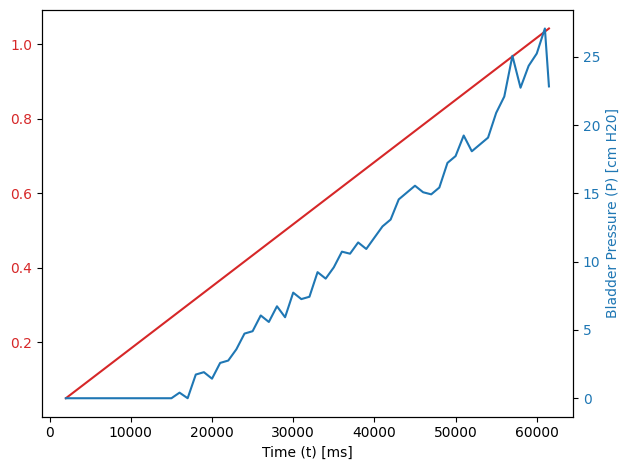

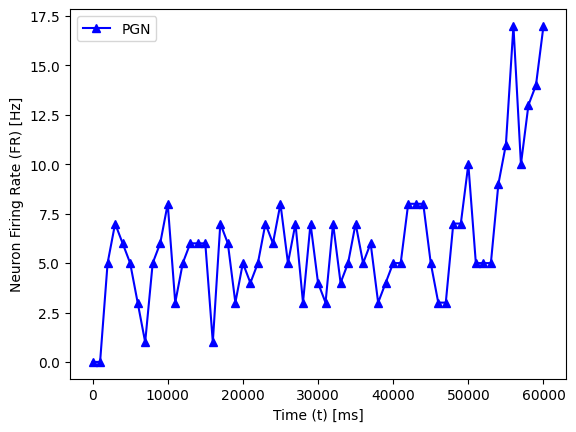

In [5]:
# Run BioNet

import os, sys, logging, faulthandler
from bmtk.simulator import bionet
from bmtk.simulator.bionet.default_setters.cell_models import loadHOC
from bmtk.simulator.bionet.modules.sim_module import SimulatorMod
from bmtk.utils.reports.spike_trains import SpikeTrains
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
from bmtk.simulator.bionet.io_tools import io
import numpy as np
from neuron import h
import pandas as pd
# from bmtk.analyzer.cell_vars import plot_report
from feedback_loop import FeedBackLoop
from plotting import plot_figure, plotting_calculator
# Import the synaptic depression/facilitation model
import synapses

import plot_results


"""
Basic Logging features, disable faulthandler if you don't want stacktraces printed
logging determines the level and file to save logs to (might be worth moving location)
"""
faulthandler.enable()
logging.basicConfig(filename='error_logs/debug_run.log', level=logging.DEBUG)

synapses.load()
logging.info('Synapses Loaded')

press_thres = 17 # cm H20 #40
                 # Lingala, et al. 2016
change_thres = 10 # cm H20 #10
                 # Need biological value for this

bionet.pyfunction_cache.add_cell_model(loadHOC, directive='hoc', model_type='biophysical')
logging.info('Cell model added')

def run(config_file):
    pc = h.ParallelContext()

    conf = bionet.Config.from_json(config_file, validate=True)
    conf.build_env()

    fbmod = FeedBackLoop()

    graph = bionet.BioNetwork.from_config(conf)
    sim = bionet.BioSimulator.from_config(conf, network=graph)
    sim.add_mod(fbmod)  # Attach the above module to the simulator.
    sim.run();

    pc.barrier();
    pc.gid_clear()
    pc.done()

    plot_results.run(sim=sim,conf=conf)

# if __name__ == '__main__':
#     if __file__ != sys.argv[-1]:
#         run(sys.argv[-1])
#     else:
#         run('config.json')

# run('config.json')
run(config_file='jsons/simulation_config.json')
# run(config_file='/content/LUT_singlecell/jsons/simulation_config.json')

In [ ]:
# DO NOT RUN PAST THIS POINT
# CODE BELOW THIS POINT ARE FILES FROM MODEL THAT CREATE THE FUNCTIONS AND PARAMETERS
# I JUST ADDED THEM FOR EASY ACCESS AND VIEW OF CODE
#
#
#
#
#
#

In [ ]:
# Feedback Loop

"""Simulates an example network of 450 cell receiving two kinds of exernal input as defined in the configuration file"""
import numpy as np
import os
import sys
from bmtk.simulator import bionet
from bmtk.simulator.bionet.modules.sim_module import SimulatorMod
from bmtk.analyzer.spike_trains import plot_raster
from bmtk.simulator.bionet.biocell import BioCell
from bmtk.simulator.bionet.pointprocesscell import PointProcessCell
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
from bmtk.simulator.bionet.io_tools import io

from neuron import h


pc = h.ParallelContext()


class FeedBackLoop(SimulatorMod):
    def __init__(self):
        self._spike_events = {}
        self._synapses = {}
        self._netcons = {}
        self._spike_records = {}
        self._vect_stims = {}
        self._spikes = {}

        self._block_length_ms = 0.0
        self._n_cells = 0
        #self._current_input_rate = 5.0
        
        self.blad_fr = 1.0
        self._prev_glob_press = 0.0
        self._glob_press = 0.0 
        self.times = []
        self.b_vols = []
        self.b_pres = []

    def _set_spike_detector(self, sim):
        for gid, cell in sim.net.get_local_cells().items():
            tvec = sim._spikes[gid]
            self._spike_records[gid] = tvec

    def initialize(self, sim):
        self._block_length_ms = sim.nsteps_block*sim.dt
        self._n_cells = len(sim.net.get_local_cells())
        print(sim.net.get_local_cells())

        self._spikes = h.Vector()  # start off with empty input
        vec_stim = h.VecStim()
        vec_stim.play(self._spikes)
        self._vect_stim = vec_stim

        for gid, cell in sim.net.get_local_cells().items():
            self._spike_events[gid] = np.array([])
            # For each cell we setup a network connection, NetCon object, that stimulates input as a series of spike
            # events mimicking a synapse. For this simple example each cell recieves only 1 virtual synapse/netcon.
            # To have more than 1 netcon in each cell you can add an extra internal loop, and _synapses and _netcons
            # will be a dictionary of lists
            if isinstance(cell, BioCell):
                # For biophysicaly detailed cells we use an Synapse object that is placed at the soma. If you want to
                # place it at somewhere different than the soma you can use the following code:
                #   seg_x, sec_obj = cell.morphology.find_sections(
                #       sections_names=[axon, soma, dend, apic],
                #       distance_ranges=[0.0, 1000.0]
                #   )
                #   syn = h.Exp2Syn(seg_x, sec=sec_obj
                syn = h.Exp2Syn(0.5, sec=cell.hobj.soma[0])
                syn.e = 0.0
                syn.tau1 = 0.1
                syn.tau2 = 0.3
                self._synapses[gid] = syn

                # create a NetCon connection on the synpase using the array of spike-time values
                nc = h.NetCon(vec_stim, syn)
                nc.threshold = sim.net.spike_threshold
                nc.weight[0] = 0.2
                nc.delay = 1.0
                self._netcons[gid] = nc

            elif isinstance(cell, PointProcessCell):
                nc = h.NetCon(vec_stim, cell.hobj)
                self._netcons[gid] = nc
                nc.weight[0] = 15 #10.2
                nc.delay = .05

        self._set_spike_detector(sim)
        pc.barrier()

    def step(self, sim, tstep):
        pass
    
    def block(self, sim, block_interval):
        block_length = sim.nsteps_block*sim.dt/1000.0
        t = sim.h.t-block_length*1000.0
        
        #### BLADDER EQUATIONS ####    
    # Grill, et al. 2016
        def blad_vol(vol):
            f = 1.5*20*vol - 10 #1.5*20*vol-10
            return f

        # Grill function returning pressure in units of cm H20
	    # Grill, et al. 2016
        def pressure(fr,v):
            p = 0.2*fr + 1.0*v
            p = max(p,0.0)
            return p 

        # Grill function returning bladder afferent firing rate in units of Hz
	    # Grill, et al. 2016
        def blad_aff_fr(p):
            fr1 = -3.0E-08*p**5 + 1.0E-5*p**4 - 1.5E-03*p**3 + 7.9E-02*p**2 - 0.6*p
            fr1 = max(fr1,5.0)
            return fr1 # Using scaling factor of 5 here to get the correct firing rate range

    ### STEP 1: Calculate PGN Firing Rate ###
        print(f'Caclulating firing rates for times {block_interval[0]*sim.dt} to {block_interval[1]*sim.dt} ms')
        print('node_id\tHz')
        summed_fr = 0
        for gid, tvec in self._spike_records.items():
            # self._spike_records is a dictionary of the recorded spikes for each cell in the previous block of
            #  time. When self._set_spike_detector() is called it will reset/empty the spike times. If you want to
            #  print/save the actual spike-times you can call self._all_spikes[gid] += list(tvec)
            if gid == 0:
              n_spikes = len(tvec)
              fr = n_spikes / (self._block_length_ms/1000.0)
              summed_fr += fr
              print(f'{gid}\t\t{fr}')
        print(f'firing rate avg: {summed_fr / self._n_cells}')
        
        # Grill 
        PGN_fr = max(2.0E-03*fr**3 - 3.3E-02*fr**2 + 1.8*fr - 0.5, 0.0)
        print("Grill PGN fr = {0} Hz".format(PGN_fr))

    ### STEP 2: Volume Calculations ###
        v_init = 0.05       # TODO: get biological value for initial bladder volume
        fill = 0.05 	 	# ml/min (Asselt et al. 2017)
        fill /= (1000 * 60) # Scale from ml/min to ml/ms
        void = 4.6 	 		# ml/min (Streng et al. 2002)
        void /= (1000 * 60) # Scale from ml/min to ml/ms
        max_v = 1.5 		# ml (Grill et al. 2019) #0.76
        vol = v_init
        
        # Filling
        if t < 60000 and vol < max_v:
            vol = fill*t*20 + v_init
        # Voiding
        elif self.blad_fr > 10:
            vol = max_v - void*(60000-t)*100
        
        # Maintain minimum volume
        if vol < v_init:
            vol = v_init
        
        # Grill
        grill_vol = blad_vol(vol)
        
    ### STEP 3: Pressure and Bladder Afferent FR Calculations ###
        p = pressure(PGN_fr, grill_vol)
        self.blad_fr = blad_aff_fr(p)
        
    ### STEP 4: Update the input spikes each cell recieves in the next time block
        # Calculate the start and stop times for the next block
        next_block_tstart = block_interval[1]*sim.dt
        next_block_tstop = next_block_tstart+self._block_length_ms

        # For this simple example we just create a randomized series of spike for the next time block for each of the
        #  14 cells. The stimuli input rate (self._current_input_rate) is increamented by 10 Hz each block, for more
        #  realistic simulations you can use the firing-rates calcualted above to adjust the incoming stimuli.
        print("Calculated Bladder Afferent Firing Rate: {0}".format(self.blad_fr))
        psg = PoissonSpikeGenerator()
        psg.add(
            node_ids= 0,
            firing_rate= self.blad_fr,
            times=(next_block_tstart/1000.0 + 0.01, next_block_tstop/1000.0),
            population= 'PGN',
        )
        
        psg.add_spikes([0], [next_block_tstop], population = "PGN")
        psg.to_csv("spikes.csv")
        #self._current_input_rate += 10.0

        for gid, cell in sim.net.get_local_cells().items():
            spikes = psg.get_times(gid, population='PGN')
            spikes = np.sort(spikes)
            #spikes = np.arange(next_block_tstart/1000.0 + 0.1, next_block_tstop/1000.0, 0.1).tolist()
            print("HEllo: \n {0}".format(spikes))
            if len(spikes) == 0:
                continue

            # The next block of code is where we update the incoming/virtual spike trains for each cell, by adding
            # each spike to the cell's netcon (eg synapse). The only caveats is the spike-trains array must
            #  1. Have atleast one spike
            #  2. Be sorted
            #  3. first spike must occur after the delay.
            # Otherwise an error will be thrown.
            self._spike_events[gid] = np.concatenate((self._spike_events[gid], spikes))
            nc = self._netcons[gid]
            for t in spikes:
                nc.event(t)

        self._set_spike_detector(sim)
        pc.barrier()
        
    ### STEP 5: Save Calculations ####
        self._prev_glob_press = self._glob_press
        self._glob_press = p 

        io.log_info('PGN firing rate = %.2f Hz' %fr)
        io.log_info('Volume = %.2f ml' %vol)
        io.log_info('Pressure = %.2f cm H20' %p)
        io.log_info('Bladder afferent firing rate = {:.2f} Hz'.format(self.blad_fr))

        # Save values in appropriate lists
        self.times.append(t)
        self.b_vols.append(vol)
        self.b_pres.append(p)

    def finalize(self, sim):
        pass

In [ ]:
# Plotting

import matplotlib.pyplot as plt
import numpy as np


def plot_figure(means, stdevs, n_steps, dt, tstep=100, fbmod=None, savefig=True):
    #Plot bladder volume and bladder pressure
    if fbmod is not None:
        fig1, ax1_1 = plt.subplots()

        color = 'tab:red'
        ax1_1.set_xlabel('Time (t) [ms]')
        # ax1_1.set_ylabel('Bladder Volume (V) [ml]', color=color)
        ax1_1.plot(fbmod.times, fbmod.b_vols, color=color)
        ax1_1.tick_params(axis='y', labelcolor=color)

        ax2_1 = ax1_1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2_1.set_ylabel('Bladder Pressure (P) [cm H20]', color=color)  # we already handled the x-label with ax1
        ax2_1.plot(fbmod.times, fbmod.b_pres, color=color)
        ax2_1.tick_params(axis='y', labelcolor=color)

        fig1.tight_layout()  # otherwise the right y-label is slightly clipped

    # tstep (ms)
    tstop = (n_steps-1)*dt
    t = np.arange(0.0,tstop,tstep)
    ind = np.floor(t/dt).astype(np.int)

    fig2 = plt.figure()
    plt.plot(t, means['Bladaff'][ind], color='b', marker='^', mfc='b', mec='b', label='PGN')
    #plt.plot(t, means['PGN'][ind], color='g', marker='o', mfc='g', mec='g', label='PGN')

    plt.xlabel('Time (t) [ms]')
    plt.ylabel('Neuron Firing Rate (FR) [Hz]')
    plt.legend()

    if savefig:
        if fbmod is not None:
            fig1.savefig('./graphs/Pressure_vol.png',transparent=True)
        fig2.savefig('./graphs/NFR_PGN.png',transparent=True)


    plt.show()

def plotting_calculator(spike_trains, n_steps, dt, window, index, num, pop):
    # window (ms)
    ind = index[pop]
    n = num[pop]
    fr_conv = np.zeros((n,n_steps))
    
    def moving_avg(x):
        window_size = np.ceil(window/dt).astype(np.int)
        x_cum = np.insert(np.cumsum(x),0,np.zeros(window_size))
        y = (x_cum[window_size:]-x_cum[:-window_size])/(window_size*dt/1000)
        return y

    for gid in range(ind,ind+n):
        spikes = np.zeros(n_steps)
        spiketimes = spike_trains.get_times(gid)
        if len(spiketimes) > 0:
            spikes[(spiketimes/dt).astype(np.int)] = 1
        fr_conv[gid-ind] = moving_avg(spikes)

    means = np.mean(fr_conv,axis=0)
    stdevs = np.std(fr_conv,axis=0)
    
    return means, stdevs

In [ ]:
# Synapses

import glob
import json
import os

from bmtk.simulator.bionet.pyfunction_cache import add_synapse_model
from neuron import h
import random

def Exp2Syn1_STSP(syn_params, sec_x, sec_id):
    """Create a Exp2Syn1_STSP synapse
    :param syn_params: parameters of a synapse
    :param sec_x: normalized distance along the section
    :param sec_id: target section
    :return: NEURON synapse object
    """

    lsyn = h.Exp2Syn1_STSP(sec_x, sec=sec_id)

    if syn_params.get('e'):
        lsyn.e = float(syn_params['e'])
    if syn_params.get('tauD1'):
        lsyn.tauD1 = float(syn_params['tauD1']) 
    if syn_params.get('d1'):
        lsyn.d1 = float(syn_params['d1']) 
    if syn_params.get('tauD2'):
        lsyn.tauD2 = float(syn_params['tauD2'])
    if syn_params.get('d2'):
        lsyn.d2 = float(syn_params['d2']) 
    if syn_params.get('tauF'):
        lsyn.tauF = float(syn_params['tauF'])
    if syn_params.get('f'):
        lsyn.f = float(syn_params['f']) 
    
    return lsyn


def exp2syn1_stsp(syn_params, xs, secs):
    """Create a list of Exp2Syn1_STSP synapses
    :param syn_params: parameters of a synapse
    :param xs: list of normalized distances along the section
    :param secs: target sections
    :return: list of NEURON synpase objects
    """
    syns = []
    for x, sec in zip(xs, secs):
        syn = Exp2Syn1_STSP(syn_params, x, sec)
        syns.append(syn)
    return syns

def load():
    add_synapse_model(Exp2Syn1_STSP, 'exp2syn1_stsp', overwrite=False)
    add_synapse_model(Exp2Syn1_STSP, overwrite=False)
    return

def syn_params_dicts(syn_dir='biophys_components/synaptic_models'):
    """
    returns: A dictionary of dictionaries containing all
    properties in the synapse json files
    """
    files = glob.glob(os.path.join(syn_dir,'*.json'))
    data = {}
    for fh in files:
        with open(fh) as f:
            data[os.path.basename(fh)] = json.load(f) #data["filename.json"] = {"prop1":"val1",...}
    return data

In [ ]:
# Plot Results

import sys, os
from bmtk.simulator import bionet
from bmtk.utils.reports.spike_trains import SpikeTrains
from feedback_loop import FeedBackLoop
import numpy as np
import pandas as pd
from plotting import plot_figure, plotting_calculator
from bmtk.analyzer.compartment import plot_traces

num = {
'Bladaff' : 1,
'PGN'     : 1
}
gids = {}
ind = 0
for pop,n in num.items():
    gids[pop] = ind
    ind += n

def run(config_file=None,sim=None,conf=None):
    if config_file is not None:
        conf = bionet.Config.from_json(config_file, validate=True)
        dt = conf['run']['dt']
        n_steps = np.ceil(conf['run']['tstop']/dt+1).astype(np.int)
        fbmod = None
    if sim is not None:
        n_steps = sim.n_steps
        dt = sim.dt
        fbmod = sim._sim_mods[[isinstance(mod,FeedBackLoop) for mod in sim._sim_mods].index(True)]
    output_dir = conf.output_dir
    print(n_steps,dt)

    spikes_df = pd.read_csv(os.path.join(output_dir,'output/spikes.csv'), sep=' ')
    print(spikes_df['node_ids'].unique())
    spike_trains = SpikeTrains.from_sonata(os.path.join(output_dir,'output/spikes.h5'))

    #plotting
    window_size = 1000
    pops = ['PGN', 'Bladaff']
    windows = [window_size]*len(pops)
    means = {}
    stdevs = {}
    for pop,win in zip(pops,windows):
        means[pop], stdevs[pop] = plotting_calculator(spike_trains, n_steps, dt, win, gids, num, pop)
    
    plot_figure(means, stdevs, n_steps, dt, tstep=window_size, fbmod=fbmod)


if __name__ == '__main__':
    if __file__ != sys.argv[-1]:
        run(config_file=sys.argv[-1])
    else:
        run(config_file='jsons/simulation_config.json')
        
    plot_traces(config_file = 'jsons/simulation_config.json', report_name = 'membrane_report', node_ids = [0], title = 'PGN Membrane Voltage', show_legend = False)


ModuleNotFoundError: ignored